## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [45]:
import sys,json
import glob, os
import pandas as pd
sys.path.append("/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL/derivatives/pilot_project_MAMSL_analyses/code/")


from convert_data import Convert_data

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [46]:
# Load config file ------------------------------------------------------------
with open('../config/config_MAMSL.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified

data=Convert_data(config) # initialize the function

Data for subjects sub-008 can be found here: /cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL//derivatives/data//sub-008
/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL//rawdata//sub-008/sess01/sub-008_20230801_133421_trial.dat
fam1
/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL//rawdata//sub-008/sess01/sub-008_20230801_133556_trial.dat
fam2
/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL//rawdata//sub-008/sess01/sub-008_20230801_133707_trial.dat
RNDpre
/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL//rawdata//sub-008/sess01/sub-008_20230801_134210_trial.dat
MA
/cerebro/cerebro1/dataset/caroline/2023_pilot_MA-MSL//rawdata//sub-008/sess01/sub-008_20230801_140656_trial.dat
RNDpost


 ### <font color=#4424D6> II. Read raw data </font >

In [47]:
filename={};movement_data={};movement_df={};movement_filter_df={};dataframe_filename={}
for subject_name in config["list_subjects"]:
    filename[subject_name]={};movement_data[subject_name]={};movement_df[subject_name]={};movement_filter_df[subject_name]={};dataframe_filename[subject_name]={}
    
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)] # name of the session for that participant
        filename[subject_name][sess]={};movement_data[subject_name][sess]={};movement_df[subject_name][sess]={};movement_filter_df[subject_name][sess]={};dataframe_filename[subject_name][sess]={}
        
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:#runs[subject_name]["sess0" + str(sess_nb+1)]:
            print(run_name)
            filename[subject_name][sess][run_name]=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_movement.bin"
            dataframe_filename[subject_name][sess][run_name]=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess + "/" + run_name + "/" + subject_name+ "_sess0"+str(sess_nb+1) + "_" + run_name +"_movement.csv"
            
            if not os.path.exists(dataframe_filename[subject_name][sess][run_name]):
                movement_data[subject_name][sess][run_name],movement_df[subject_name][sess][run_name]=data.read_movement(subject_name,
                                                                                                                     data_filename=filename[subject_name][sess][run_name])
    
                
                movement_filter_df[subject_name][sess][run_name]=data.filter_movement(movement_df[subject_name][sess][run_name],output_file=dataframe_filename[subject_name][sess][run_name])

 ### <font color=#4424D6> III. Plot  </font >

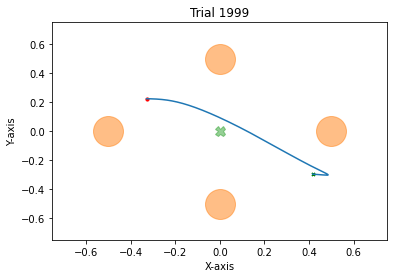

In [52]:
for subject_name in config["list_subjects"]:
    for sess_nb in range(0,1):#len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)]
        for run_name in ['RNDpost',"MA"]:#config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:#runs[subject_name]["sess0" + str(sess_nb+1)]:
            
            ana_dir=config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess+ "/" + run_name 
            movie_file=ana_dir +"/"+ subject_name + "_"+sess+"_"+run_name + "_trials_movie.avi"

            
            if not os.path.exists(movie_file):
                data.plot_trial(subject_name,sess,run_name,create_movie=True)#,trial_range=range(100,120))
           

In [54]:
# Create a new dataframe to manually enter a value for the trials to be delated
for subject_name in config["list_subjects"]:
    for sess_nb in range(0,len(config["list_subjects"][subject_name])):
        sess=config["list_subjects"][subject_name]["sess0" + str(sess_nb+1)]
        for run_name in config["subjects_acq"][subject_name]["sess0" + str(sess_nb+1)]:#runs[subject_name]["sess0" + str(sess_nb+1)]:

            trial_filename=glob.glob(config["main_dir"] + config["data_dir"] + "/" + subject_name + "/sess_"+ sess+ "/" + run_name + "/*trial.dat")[0]
            trial_df=pd.read_csv(trial_filename,delimiter=" ")
            trial_df["remove_trial"]=0;trial_df["remove_seq"]=0;trial_df["run_name"]=run_name
            trial_df_new=trial_df[["subject","run_name","trial","remove_trial","remove_seq","trialInSeq","seqInBlock","block","target.angle","targetHit","t.move","t.hit"]] 
            output_file=trial_filename.split(".")[0] + "filter.csv"
            if not os.path.exists(output_file):
                trial_df_new.to_csv(output_file, index=False)